In [101]:
import numpy as np
import string
import pandas as pd
import nltk
import keras
import os

from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, train_test_split, cross_validate
from sklearn.utils import shuffle
from sklearn import preprocessing, svm#scale, regresions, cross shuffle stats sepeareate data


from nltk.corpus import stopwords

from keras.models import Model
from keras.layers import *
from keras.optimizers import Adam
from keras import metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf

tf.enable_eager_execution()

import matplotlib as mpl
import matplotlib.pyplot as plt
import os


# modify the data folder accordingly
data_folder = "data/"
cache_folder = "cache/"

stop_words = set(stopwords.words("english") + list(string.punctuation))

# LSTM Model

In [2]:
data = pd.read_csv("data/Raw_data_new_sentiment.csv")

In [3]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [4]:
data

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,percentage,change,Sentiment_1,Sentiment_total,Sentiment_component
0,2017/11/12 05:00,ETHUSD,312.34,316.34,308.00,310.16,3263.16,1017470.49,0.000000,0,0.000000,0.000000,0.0000
1,2017/11/12 06:00,ETHUSD,310.16,310.16,301.12,307.00,3463.15,1056163.67,-0.010188,-1,0.000000,0.000000,0.0000
2,2017/11/12 07:00,ETHUSD,307.00,314.37,301.37,307.16,6681.07,2066540.88,0.000521,1,0.000000,0.000000,0.0000
3,2017/11/12 08:00,ETHUSD,307.16,310.00,302.48,304.79,2152.84,656841.26,-0.007716,-1,-1.000000,-0.142454,0.0000
4,2017/11/12 09:00,ETHUSD,304.79,305.00,300.38,302.40,2832.44,857577.88,-0.007841,-1,0.000000,0.000000,-0.1531
5,2017/11/12 10:00,ETHUSD,302.40,308.09,300.11,305.18,2169.39,657893.16,0.009193,1,1.000000,0.616212,0.0000
6,2017/11/12 11:00,ETHUSD,305.18,306.79,301.36,303.88,1115.28,339483.77,-0.004260,-1,1.000000,0.712410,0.8519
7,2017/11/12 12:00,ETHUSD,303.88,305.43,301.37,301.59,1903.05,577686.54,-0.007536,-1,0.000000,0.000000,1.0389
8,2017/11/12 13:00,ETHUSD,301.59,306.98,301.22,304.83,2469.31,749944.26,0.010743,1,1.000000,0.614158,0.0000
9,2017/11/12 14:00,ETHUSD,304.83,305.80,301.00,305.38,1936.74,587803.84,0.001804,1,1.000000,0.625350,0.8481


In [5]:
import numpy as np

In [6]:
TRAIN_SPLIT = 16000

In [7]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [8]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [9]:
def create_time_steps(length):
  return list(range(-length, 0))

In [10]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

##  Baseline Model (Price Data Only)

In [11]:
feature_list =  ["Close", "Volume ETH", "Volume USD"]
features_0 = data[feature_list]
features_0.index = data["Date"]

In [12]:
## Standardize data
dataset_0 = features_0.values
data_mean_0 = dataset_0[:TRAIN_SPLIT].mean(axis=0)
data_std_0 = dataset_0[:TRAIN_SPLIT].std(axis=0)
dataset_0 = (dataset_0-data_mean_0)/data_std_0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023432573978>,
      dtype=object)

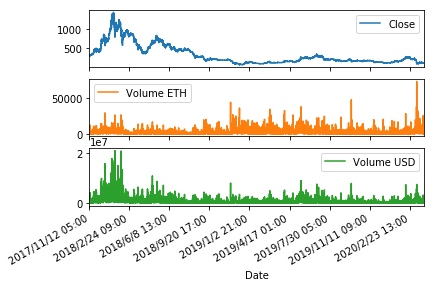

In [13]:
features_0.plot(subplots=True)

### Single Step Model

In [14]:
past_history = 48
future_target = 1
STEP = 1

BATCH_SIZE = 48
BUFFER_SIZE = 10000

x_train_single_0, y_train_single_0 = multivariate_data(dataset_0, dataset_0[:, -3], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single_0, y_val_single_0 = multivariate_data(dataset_0, dataset_0[:, -3],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

train_data_single_0 = tf.data.Dataset.from_tensor_slices((x_train_single_0, y_train_single_0))
train_data_single_0 = train_data_single_0.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat(10)

val_data_single_0 = tf.data.Dataset.from_tensor_slices((x_val_single_0, y_val_single_0))
val_data_single_0 = val_data_single_0.batch(BATCH_SIZE).repeat(10)

single_step_model_0 = tf.keras.models.Sequential()
single_step_model_0.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single_0.shape[-2:]))
single_step_model_0.add(tf.keras.layers.Dropout(0.2)) ## Add dropout
single_step_model_0.add(tf.keras.layers.Dense(1))

single_step_model_0.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Baseline Model
Epoch 1/10
Instructions for updating:
Use tf.cast instead.
100/100 [==============================] - 7s 67ms/step - loss: 0.2060 - val_loss: 0.0713
Epoch 2/10
100/100 [==============================] - 5s 51ms/step - loss: 0.0876 - val_loss: 0.0313
Epoch 3/10
100/100 [==============================] - 5s 49ms/step - loss: 0.0786 - val_loss: 0.0154
Epoch 4/10
100/100 [==============================] - 5s 50ms/step - loss: 0.0844 - val_loss: 0.0119
Epoch 5/10
100/100 [==============================] - 5s 50ms/step - loss: 0.0753 - val_loss: 0.0162
Epoch 6/10
100/100 [==============================] - 5s 48ms/step - loss: 0.0724 - val_loss: 0.0494
Epoch 7/10
100/100 [==============================] - 5s 49ms/step - loss: 0.0739 - val_loss: 0.0309
Epoch 8/10
100/100 [==============================] - 5s 50ms/step - loss: 0.0749 - val_loss: 0.0152
Epoch 9/10
100/100 [==============================] - 5s 49ms/step - loss: 0.0687 - val_loss: 0.0513
Epoch 10/10
100/100 [=======

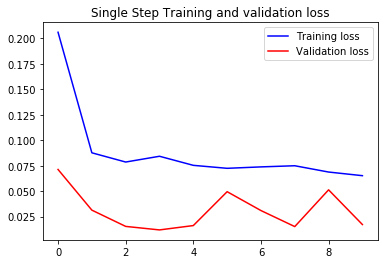

In [15]:
EVALUATION_INTERVAL = 100
EPOCHS = 10
    
print("=============================================================")
print("Baseline Model")
print("=============================================================")

single_step_history_0 = single_step_model_0.fit(train_data_single_0, epochs=EPOCHS,
                                           steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single_0,
                                            validation_steps=50)
    
plot_train_history(single_step_history_0,
                   'Single Step Training and validation loss')

In [16]:
for x, y in val_data_single_0.take(3):
  plot = show_plot([x[0][:,-3].numpy(), y[0].numpy(),
                    single_step_model_0.predict(x)[0]], 2,
                   'Single Step Prediction')
  plot.show()

OverflowError: Python int too large to convert to C long

- AUC Score (Up or Down)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
true_list = []
pred_list = []
for x, y in val_data_single_0.take(102):

    if x[0][:,-3][-1].numpy() > y[0].numpy():
        true_list.append(-1)
    else:
        true_list.append(1)
    
    if x[0][:,-3][-1].numpy() > single_step_model_0.predict(x)[0][0]:
        pred_list.append(-1)
    else:
        pred_list.append(1)
    
auc_score = roc_auc_score(true_list, pred_list)
print(auc_score)

- MSE Score

In [ ]:
true_value = []
pred_value = []
for x, y in val_data_single_0.take(102):

    true_value.append(y[0].numpy())
    pred_value.append(single_step_model_0.predict(x)[0][0])

In [ ]:
for i in range(0,102):
    true_value[i] = true_value[i]*data_std_0[0] + data_mean_0[0]
    pred_value[i] = pred_value[i]*data_std_0[0] + data_mean_0[0]

In [ ]:
difference_array = np.subtract(true_value, pred_value)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print(mse)

In [ ]:
plt.plot(true_value, 'red', pred_value, 'blue')

### Multiple Step Model

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 0]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In [ ]:
future_target = 12

x_train_multi_0, y_train_multi_0 = multivariate_data(dataset_0, dataset_0[:, -3], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi_0, y_val_multi_0 = multivariate_data(dataset_0, dataset_0[:, -3],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

train_data_multi_0 = tf.data.Dataset.from_tensor_slices((x_train_multi_0, y_train_multi_0))
train_data_multi_0 = train_data_multi_0.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat(10)

val_data_multi_0 = tf.data.Dataset.from_tensor_slices((x_val_multi_0, y_val_multi_0))
val_data_multi_0 = val_data_multi_0.batch(BATCH_SIZE).repeat(10)

multi_step_model_0 = tf.keras.models.Sequential()
multi_step_model_0.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi_0.shape[-2:]))
multi_step_model_0.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model_0.add(tf.keras.layers.Dropout(0.2)) ## Add dropout
multi_step_model_0.add(tf.keras.layers.Dense(12))

multi_step_model_0.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [ ]:
multi_step_history_0 = multi_step_model_0.fit(train_data_multi_0, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi_0,
                                          validation_steps=50)
plot_train_history(multi_step_history_0, 'Multi-Step Training and validation loss')

In [ ]:
for x, y in val_data_multi_0.take(10):
    multi_step_plot(x[0], y[0], multi_step_model_0.predict(x)[0])

- MSE Score

In [ ]:
true_value = []
pred_value = []
for x, y in val_data_multi_0.take(102):

    true_value.append(y[0].numpy())
    pred_value.append(multi_step_model_0.predict(x)[0])

In [ ]:
for i in range(0,102):
    true_value[i] = true_value[i]*data_std_0[0] + data_mean_0[0]
    pred_value[i] = pred_value[i]*data_std_0[0] + data_mean_0[0]

In [ ]:
difference_array = np.subtract(true_value, pred_value)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print(mse)

## Sentiment Model (Component Score)

In [ ]:
feature_list =  ["Close", "Volume ETH", "Volume USD", "Sentiment_component"]
features_1 = data[feature_list]
features_1.index = data["Date"]

In [ ]:
## Standardize data
dataset_1 = features_1.values
data_mean_1 = dataset_1[:TRAIN_SPLIT].mean(axis=0)
data_std_1 = dataset_1[:TRAIN_SPLIT].std(axis=0)
dataset_1 = (dataset_1-data_mean_1)/data_std_1

In [ ]:
features_1["Sentiment_component"].plot(subplots=True)

### Single Step Model

In [ ]:
past_history = 48
future_target = 1
STEP = 1

BATCH_SIZE = 48
BUFFER_SIZE = 10000

x_train_single_1, y_train_single_1 = multivariate_data(dataset_1, dataset_1[:, -4], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single_1, y_val_single_1 = multivariate_data(dataset_1, dataset_1[:, -4],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

train_data_single_1 = tf.data.Dataset.from_tensor_slices((x_train_single_1, y_train_single_1))
train_data_single_1 = train_data_single_1.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat(10)

val_data_single_1 = tf.data.Dataset.from_tensor_slices((x_val_single_1, y_val_single_1))
val_data_single_1 = val_data_single_1.batch(BATCH_SIZE).repeat(10)

single_step_model_1 = tf.keras.models.Sequential()
single_step_model_1.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single_1.shape[-2:]))
single_step_model_1.add(tf.keras.layers.Dropout(0.2)) ## Add dropout
single_step_model_1.add(tf.keras.layers.Dense(1))

single_step_model_1.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [ ]:
EVALUATION_INTERVAL = 100
EPOCHS = 10
    
print("=============================================================")
print("Sentiment Model - Component")
print("=============================================================")

single_step_history_1 = single_step_model_1.fit(train_data_single_1, epochs=EPOCHS,
                                           steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single_1,
                                            validation_steps=50)
    
plot_train_history(single_step_history_1,
                   'Single Step Training and validation loss')

In [ ]:
for x, y in val_data_single_1.take(3):
  plot = show_plot([x[0][:,-4].numpy(), y[0].numpy(),
                    single_step_model_1.predict(x)[0]], 2,
                   'Single Step Prediction')
  plot.show()

-  AUC Score (Up or Down)

In [ ]:
true_list = []
pred_list = []
for x, y in val_data_single_1.take(102):

    if x[0][:,-4][-1].numpy() > y[0].numpy():
        true_list.append(-1)
    else:
        true_list.append(1)
    
    if x[0][:,-4][-1].numpy() > single_step_model_1.predict(x)[0][0]:
        pred_list.append(-1)
    else:
        pred_list.append(1)
    
auc_score = roc_auc_score(true_list, pred_list)
print(auc_score)

- MSE Score

In [ ]:
true_value = []
pred_value = []
for x, y in val_data_single_1.take(102):

    true_value.append(y[0].numpy())
    pred_value.append(single_step_model_1.predict(x)[0][0])

In [ ]:
for i in range(0,102):
    true_value[i] = true_value[i]*data_std_1[0] + data_mean_1[0]
    pred_value[i] = pred_value[i]*data_std_1[0] + data_mean_1[0]

In [ ]:
difference_array = np.subtract(true_value, pred_value)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print(mse)

In [ ]:
plt.plot(true_value, 'red', pred_value, 'blue')

### Multiple Steps Model

In [ ]:
future_target = 12

x_train_multi_1, y_train_multi_1 = multivariate_data(dataset_1, dataset_1[:, -4], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi_1, y_val_multi_1 = multivariate_data(dataset_1, dataset_1[:, -4],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

train_data_multi_1 = tf.data.Dataset.from_tensor_slices((x_train_multi_1, y_train_multi_1))
train_data_multi_1 = train_data_multi_1.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat(10)

val_data_multi_1 = tf.data.Dataset.from_tensor_slices((x_val_multi_1, y_val_multi_1))
val_data_multi_1 = val_data_multi_1.batch(BATCH_SIZE).repeat(10)

multi_step_model_1 = tf.keras.models.Sequential()
multi_step_model_1.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi_1.shape[-2:]))
multi_step_model_1.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model_1.add(tf.keras.layers.Dropout(0.2)) ## Add dropout
multi_step_model_1.add(tf.keras.layers.Dense(12))

multi_step_model_1.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [ ]:
multi_step_history_1 = multi_step_model_1.fit(train_data_multi_1, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi_1,
                                          validation_steps=50)
plot_train_history(multi_step_history_1, 'Multi-Step Training and validation loss')

In [ ]:
for x, y in val_data_multi_1.take(3):
    multi_step_plot(x[0], y[0], multi_step_model_1.predict(x)[0])

- MSE Score

In [ ]:
true_value = []
pred_value = []
for x, y in val_data_multi_1.take(102):

    true_value.append(y[0].numpy())
    pred_value.append(multi_step_model_1.predict(x)[0])

In [ ]:
for i in range(0,102):
    true_value[i] = true_value[i]*data_std_1[0] + data_mean_1[0]
    pred_value[i] = pred_value[i]*data_std_1[0] + data_mean_1[0]

In [ ]:
difference_array = np.subtract(true_value, pred_value)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print(mse)

## Sentiment Model (total)

In [ ]:
feature_list =  ["Close", "Volume ETH", "Volume USD", "Sentiment_total"]
features_2 = data[feature_list]
features_2.index = data["Date"]

In [ ]:
## Standardize data
dataset_2 = features_2.values
data_mean_2 = dataset_2[:TRAIN_SPLIT].mean(axis=0)
data_std_2 = dataset_2[:TRAIN_SPLIT].std(axis=0)
dataset_2 = (dataset_2-data_mean_2)/data_std_2

In [ ]:
features_2["Sentiment_total"].plot(subplots=True)

### Single Step Model

In [ ]:
past_history = 48
future_target = 1
STEP = 1

BATCH_SIZE = 48
BUFFER_SIZE = 10000

x_train_single_2, y_train_single_2 = multivariate_data(dataset_2, dataset_2[:, -4], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single_2, y_val_single_2 = multivariate_data(dataset_2, dataset_2[:, -4],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

train_data_single_2 = tf.data.Dataset.from_tensor_slices((x_train_single_2, y_train_single_2))
train_data_single_2 = train_data_single_2.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat(10)

val_data_single_2 = tf.data.Dataset.from_tensor_slices((x_val_single_2, y_val_single_2))
val_data_single_2 = val_data_single_2.batch(BATCH_SIZE).repeat(10)

single_step_model_2 = tf.keras.models.Sequential()
single_step_model_2.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single_2.shape[-2:]))
single_step_model_2.add(tf.keras.layers.Dropout(0.2)) ## Add dropout
single_step_model_2.add(tf.keras.layers.Dense(1))

single_step_model_2.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [ ]:
EVALUATION_INTERVAL = 100
EPOCHS = 10
    
print("=============================================================")
print("Sentiment Model 1")
print("=============================================================")

single_step_history_2 = single_step_model_2.fit(train_data_single_2, epochs=EPOCHS,
                                           steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single_2,
                                            validation_steps=50)
    
plot_train_history(single_step_history_2,
                   'Single Step Training and validation loss')

In [ ]:
for x, y in val_data_single_2.take(3):
  plot = show_plot([x[0][:,-4].numpy(), y[0].numpy(),
                    single_step_model_2.predict(x)[0]], 2,
                   'Single Step Prediction')
  plot.show()

- AUC Score

In [ ]:
true_list = []
pred_list = []
for x, y in val_data_single_2.take(102):

    if x[0][:,-4][-1].numpy() > y[0].numpy():
        true_list.append(-1)
    else:
        true_list.append(1)
    
    if x[0][:,-4][-1].numpy() > single_step_model_2.predict(x)[0][0]:
        pred_list.append(-1)
    else:
        pred_list.append(1)
    
auc_score = roc_auc_score(true_list, pred_list)
print(auc_score)

- MSE Score

In [ ]:
true_value = []
pred_value = []
for x, y in val_data_single_2.take(102):

    true_value.append(y[0].numpy())
    pred_value.append(single_step_model_2.predict(x)[0][0])

In [ ]:
for i in range(0,102):
    true_value[i] = true_value[i]*data_std_2[0] + data_mean_2[0]
    pred_value[i] = pred_value[i]*data_std_2[0] + data_mean_2[0]

In [ ]:
difference_array = np.subtract(true_value, pred_value)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print(mse)

In [ ]:
plt.plot(true_value, 'red', pred_value, 'blue')

### Multiple Steps Model

In [ ]:
future_target = 12

x_train_multi_2, y_train_multi_2 = multivariate_data(dataset_2, dataset_2[:, -4], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi_2, y_val_multi_2 = multivariate_data(dataset_2, dataset_2[:, -4],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

train_data_multi_2 = tf.data.Dataset.from_tensor_slices((x_train_multi_2, y_train_multi_2))
train_data_multi_2 = train_data_multi_2.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat(10)

val_data_multi_2 = tf.data.Dataset.from_tensor_slices((x_val_multi_2, y_val_multi_2))
val_data_multi_2 = val_data_multi_2.batch(BATCH_SIZE).repeat(10)

multi_step_model_2 = tf.keras.models.Sequential()
multi_step_model_2.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi_2.shape[-2:]))
multi_step_model_2.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model_2.add(tf.keras.layers.Dropout(0.2)) ## Add dropout
multi_step_model_2.add(tf.keras.layers.Dense(12))

multi_step_model_2.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [ ]:
multi_step_history_2 = multi_step_model_2.fit(train_data_multi_2, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi_2,
                                          validation_steps=50)
plot_train_history(multi_step_history_2, 'Multi-Step Training and validation loss')

In [ ]:
for x, y in val_data_multi_2.take(3):
    multi_step_plot(x[0], y[0], multi_step_model_2.predict(x)[0])

- MSE Score

In [ ]:
true_value = []
pred_value = []
for x, y in val_data_multi_2.take(102):

    true_value.append(y[0].numpy())
    pred_value.append(multi_step_model_2.predict(x)[0])

In [ ]:
for i in range(0,102):
    true_value[i] = true_value[i]*data_std_2[0] + data_mean_2[0]
    pred_value[i] = pred_value[i]*data_std_2[0] + data_mean_2[0]

In [ ]:
difference_array = np.subtract(true_value, pred_value)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print(mse)

SVM Model

In [5]:
data

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,percentage,change,Sentiment_1,Sentiment_total,Sentiment_component
0,2017/11/12 05:00,ETHUSD,312.34,316.34,308.00,310.16,3263.16,1017470.49,0.000000,0,0.000000,0.000000,0.0000
1,2017/11/12 06:00,ETHUSD,310.16,310.16,301.12,307.00,3463.15,1056163.67,-0.010188,-1,0.000000,0.000000,0.0000
2,2017/11/12 07:00,ETHUSD,307.00,314.37,301.37,307.16,6681.07,2066540.88,0.000521,1,0.000000,0.000000,0.0000
3,2017/11/12 08:00,ETHUSD,307.16,310.00,302.48,304.79,2152.84,656841.26,-0.007716,-1,-1.000000,-0.142454,0.0000
4,2017/11/12 09:00,ETHUSD,304.79,305.00,300.38,302.40,2832.44,857577.88,-0.007841,-1,0.000000,0.000000,-0.1531
5,2017/11/12 10:00,ETHUSD,302.40,308.09,300.11,305.18,2169.39,657893.16,0.009193,1,1.000000,0.616212,0.0000
6,2017/11/12 11:00,ETHUSD,305.18,306.79,301.36,303.88,1115.28,339483.77,-0.004260,-1,1.000000,0.712410,0.8519
7,2017/11/12 12:00,ETHUSD,303.88,305.43,301.37,301.59,1903.05,577686.54,-0.007536,-1,0.000000,0.000000,1.0389
8,2017/11/12 13:00,ETHUSD,301.59,306.98,301.22,304.83,2469.31,749944.26,0.010743,1,1.000000,0.614158,0.0000
9,2017/11/12 14:00,ETHUSD,304.83,305.80,301.00,305.38,1936.74,587803.84,0.001804,1,1.000000,0.625350,0.8481


In [115]:
features_1 = ["Volume ETH", "Volume USD","Sentiment_component"]
x_1 = data[features_1]

y = data['change']

In [116]:
del y[0]

In [117]:
x_1 = x_1.drop(axis=0, index=0)

In [120]:
def h_test(features, ker, y):
    x_1 = data[features]

    x_1 = x_1.drop(axis=0, index=0)
    clf = svm.SVC(kernel=ker,gamma='scale')
    X_train, X_test, y_train, y_test = train_test_split(x_1,y,test_size=0.2)
    clf.fit(X_train, y_train)

    pred_y = clf.predict(X_test)
    print(confusion_matrix(y_test,pred_y,labels=[1,0,-1]))

    score_1 = sum(1 for x,y in zip(y_test,pred_y) if x == y) / len(y_test)
    return score_1

def h_print(features,y):
    s_1 = h_test(features,"rbf",y)
    print(s_1)
    s_2 = h_test(features,"poly",y)
    print(s_2)

In [121]:
h_print(["Volume ETH", "Volume USD"],y)

[[1902    0  131]
 [  14    0    0]
 [2012    0  123]]
0.48421807747489237
[[2044    0    2]
 [  15    0    0]
 [2119    0    2]]
0.48923959827833574


In [122]:
h_print(["Volume ETH", "Volume USD","Sentiment_component"],y)

[[1905    0  171]
 [  12    0    0]
 [1943    0  151]]
0.4916307986609278
[[   1    0 2089]
 [   0    0   20]
 [   3    0 2069]]
0.4949784791965567


In [123]:
h_print(["Volume ETH", "Volume USD","Sentiment_total"],y)

[[ 312    0 1825]
 [   1    0   12]
 [ 301    0 1731]]
0.4885222381635581
[[2077    0    2]
 [  14    0    0]
 [2084    0    5]]
0.49784791965566716


In [124]:
h_print(["Volume ETH", "Volume USD","Sentiment_component","Sentiment_total"],y)

[[1880    0  178]
 [  19    0    0]
 [1902    0  203]]
0.49808703969392637
[[2068    0    0]
 [  18    0    0]
 [2096    0    0]]
0.49450023912003827


In [8]:
clf = svm.SVC(kernel='rbf',gamma='scale')
X_train, X_test, y_train, y_test = train_test_split(x_1,y,test_size=0.2)
clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)
sum(1 for x,y in zip(y_test,pred_y) if x == y) / len(y_test)

0.49928263988522237

In [8]:
clf = svm.SVC(kernel='poly',gamma='scale')
X_train, X_test, y_train, y_test = train_test_split(x_1,y,test_size=0.2)
clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)
sum(1 for x,y in zip(y_test,pred_y) if x == y) / len(y_test)

0.5023912003825921

In [9]:
features_2 = ["Volume ETH", "Volume USD","Sentiment_total"]
x_2 = data[features_2]

x_2 = x_2.drop(axis=0, index=0)
clf = svm.SVC(kernel='rbf',gamma='scale')
X_train, X_test, y_train, y_test = train_test_split(x_2,y,test_size=0.2)
clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)

sum(1 for x,y in zip(y_test,pred_y) if x == y) / len(y_test)

0.4921090387374462

In [13]:
features_2 = ["Volume ETH", "Volume USD","Sentiment_total"]
x_2 = data[features_2]

x_2 = x_2.drop(axis=0, index=0)
clf = svm.SVC(kernel='poly',gamma='scale')
X_train, X_test, y_train, y_test = train_test_split(x_2,y,test_size=0.2)
clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)

sum(1 for x,y in zip(y_test,pred_y) if x == y) / len(y_test)

0.49808703969392637

In [10]:
features_3 = ["Volume ETH", "Volume USD"]
x_3 = data[features_3]

x_3 = x_3.drop(axis=0, index=0)

clf = svm.SVC(kernel='rbf',gamma='scale')

X_train, X_test, y_train, y_test = train_test_split(x_3,y,test_size=0.2)
clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)

sum(1 for x,y in zip(y_test,pred_y) if x == y) / len(y_test)

0.5074127211860354

In [6]:
features_3 = ["Volume ETH", "Volume USD"]
x_3 = data[features_3]

x_3 = x_3.drop(axis=0, index=0)

clf = svm.SVC(kernel='poly',gamma='scale')

X_train, X_test, y_train, y_test = train_test_split(x_3,y,test_size=0.2)
clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)

sum(1 for x,y in zip(y_test,pred_y) if x == y) / len(y_test)

0.491869918699187

In [12]:
features_4 = ["Volume ETH", "Volume USD","Sentiment_component","Sentiment_total"]
x_4 = data[features_4]

x_4 = x_4.drop(axis=0, index=0)

clf = svm.SVC(kernel='rbf',gamma='scale')

X_train, X_test, y_train, y_test = train_test_split(x_4,y,test_size=0.2)
clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)

sum(1 for x,y in zip(y_test,pred_y) if x == y) / len(y_test)

0.5016738402678145

In [7]:
features_4 = ["Volume ETH", "Volume USD","Sentiment_component","Sentiment_total"]
x_4 = data[features_4]

x_4 = x_4.drop(axis=0, index=0)

clf = svm.SVC(kernel='poly',gamma='scale')

X_train, X_test, y_train, y_test = train_test_split(x_4,y,test_size=0.2)
clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)

sum(1 for x,y in zip(y_test,pred_y) if x == y) / len(y_test)

0.49760879961740795

Prepare Daily Data

In [8]:
date1 = '2017/11/12'
date2 = '2020/4/01'
mydates = pd.date_range(date1, date2).tolist()

In [20]:
days = []

for dates in mydates:
    d = dates.strftime("%Y/%m/%d")
    days.append(d)

In [33]:
days

['2017/11/12',
 '2017/11/13',
 '2017/11/14',
 '2017/11/15',
 '2017/11/16',
 '2017/11/17',
 '2017/11/18',
 '2017/11/19',
 '2017/11/20',
 '2017/11/21',
 '2017/11/22',
 '2017/11/23',
 '2017/11/24',
 '2017/11/25',
 '2017/11/26',
 '2017/11/27',
 '2017/11/28',
 '2017/11/29',
 '2017/11/30',
 '2017/12/01',
 '2017/12/02',
 '2017/12/03',
 '2017/12/04',
 '2017/12/05',
 '2017/12/06',
 '2017/12/07',
 '2017/12/08',
 '2017/12/09',
 '2017/12/10',
 '2017/12/11',
 '2017/12/12',
 '2017/12/13',
 '2017/12/14',
 '2017/12/15',
 '2017/12/16',
 '2017/12/17',
 '2017/12/18',
 '2017/12/19',
 '2017/12/20',
 '2017/12/21',
 '2017/12/22',
 '2017/12/23',
 '2017/12/24',
 '2017/12/25',
 '2017/12/26',
 '2017/12/27',
 '2017/12/28',
 '2017/12/29',
 '2017/12/30',
 '2017/12/31',
 '2018/01/01',
 '2018/01/02',
 '2018/01/03',
 '2018/01/04',
 '2018/01/05',
 '2018/01/06',
 '2018/01/07',
 '2018/01/08',
 '2018/01/09',
 '2018/01/10',
 '2018/01/11',
 '2018/01/12',
 '2018/01/13',
 '2018/01/14',
 '2018/01/15',
 '2018/01/16',
 '2018/01/

In [41]:
import datetime

date = data.Date
d_new = []
for d in date:
    day = datetime.datetime.strptime(d, "%Y/%m/%d %H:%M")
    d_new.append(day)

In [42]:
d_new

[datetime.datetime(2017, 11, 12, 5, 0),
 datetime.datetime(2017, 11, 12, 6, 0),
 datetime.datetime(2017, 11, 12, 7, 0),
 datetime.datetime(2017, 11, 12, 8, 0),
 datetime.datetime(2017, 11, 12, 9, 0),
 datetime.datetime(2017, 11, 12, 10, 0),
 datetime.datetime(2017, 11, 12, 11, 0),
 datetime.datetime(2017, 11, 12, 12, 0),
 datetime.datetime(2017, 11, 12, 13, 0),
 datetime.datetime(2017, 11, 12, 14, 0),
 datetime.datetime(2017, 11, 12, 15, 0),
 datetime.datetime(2017, 11, 12, 16, 0),
 datetime.datetime(2017, 11, 12, 17, 0),
 datetime.datetime(2017, 11, 12, 18, 0),
 datetime.datetime(2017, 11, 12, 19, 0),
 datetime.datetime(2017, 11, 12, 20, 0),
 datetime.datetime(2017, 11, 12, 21, 0),
 datetime.datetime(2017, 11, 12, 22, 0),
 datetime.datetime(2017, 11, 12, 23, 0),
 datetime.datetime(2017, 11, 13, 0, 0),
 datetime.datetime(2017, 11, 13, 1, 0),
 datetime.datetime(2017, 11, 13, 2, 0),
 datetime.datetime(2017, 11, 13, 3, 0),
 datetime.datetime(2017, 11, 13, 4, 0),
 datetime.datetime(2017, 1

In [45]:
day_new = []

for dates in d_new:
    d = dates.strftime("%Y/%m/%d %H:%M")
    day_new.append(d)

In [46]:
day_new

['2017/11/12 05:00',
 '2017/11/12 06:00',
 '2017/11/12 07:00',
 '2017/11/12 08:00',
 '2017/11/12 09:00',
 '2017/11/12 10:00',
 '2017/11/12 11:00',
 '2017/11/12 12:00',
 '2017/11/12 13:00',
 '2017/11/12 14:00',
 '2017/11/12 15:00',
 '2017/11/12 16:00',
 '2017/11/12 17:00',
 '2017/11/12 18:00',
 '2017/11/12 19:00',
 '2017/11/12 20:00',
 '2017/11/12 21:00',
 '2017/11/12 22:00',
 '2017/11/12 23:00',
 '2017/11/13 00:00',
 '2017/11/13 01:00',
 '2017/11/13 02:00',
 '2017/11/13 03:00',
 '2017/11/13 04:00',
 '2017/11/13 05:00',
 '2017/11/13 06:00',
 '2017/11/13 07:00',
 '2017/11/13 08:00',
 '2017/11/13 09:00',
 '2017/11/13 10:00',
 '2017/11/13 11:00',
 '2017/11/13 12:00',
 '2017/11/13 13:00',
 '2017/11/13 14:00',
 '2017/11/13 15:00',
 '2017/11/13 16:00',
 '2017/11/13 17:00',
 '2017/11/13 18:00',
 '2017/11/13 19:00',
 '2017/11/13 20:00',
 '2017/11/13 21:00',
 '2017/11/13 22:00',
 '2017/11/13 23:00',
 '2017/11/14 00:00',
 '2017/11/14 01:00',
 '2017/11/14 02:00',
 '2017/11/14 03:00',
 '2017/11/14 

In [48]:
data.Date = day_new
data.Date

0        2017/11/12 05:00
1        2017/11/12 06:00
2        2017/11/12 07:00
3        2017/11/12 08:00
4        2017/11/12 09:00
5        2017/11/12 10:00
6        2017/11/12 11:00
7        2017/11/12 12:00
8        2017/11/12 13:00
9        2017/11/12 14:00
10       2017/11/12 15:00
11       2017/11/12 16:00
12       2017/11/12 17:00
13       2017/11/12 18:00
14       2017/11/12 19:00
15       2017/11/12 20:00
16       2017/11/12 21:00
17       2017/11/12 22:00
18       2017/11/12 23:00
19       2017/11/13 00:00
20       2017/11/13 01:00
21       2017/11/13 02:00
22       2017/11/13 03:00
23       2017/11/13 04:00
24       2017/11/13 05:00
25       2017/11/13 06:00
26       2017/11/13 07:00
27       2017/11/13 08:00
28       2017/11/13 09:00
29       2017/11/13 10:00
               ...       
20881    2020/03/31 06:00
20882    2020/03/31 07:00
20883    2020/03/31 08:00
20884    2020/03/31 09:00
20885    2020/03/31 10:00
20886    2020/03/31 11:00
20887    2020/03/31 12:00
20888    202

In [62]:
data.iloc[20910].Date[11:13]

'11'

In [66]:
i = 0
close = []
v_usd = []
v_eth = []
s_com = []
s_tot = []

v_u = 0
v_e = 0
s_c = 0
s_t = 0
    
for index,record in data.iterrows():
    d = record.Date[:10]
    h = record.Date[11:13]
    print(d+" "+h)
    if d == days[i]: 
        v_u = v_u + record["Volume USD"]
        v_e = v_e + record["Volume ETH"]
        s_c = s_c + record["Sentiment_component"]
        s_t = s_t + record["Sentiment_total"]
        
        if h == '23': #end of day
            close.append(record["Close"])
            v_usd.append(v_u)
            v_eth.append(v_e)
            s_com.append(s_c)
            s_tot.append(s_t)
            
            v_u = 0 #restore variables for a new day
            v_e = 0
            s_c = 0
            s_t = 0
            
            i = i + 1
            
        if d == "2020/04/01" and h == "11": #end of data
            close.append(record["Close"])
            v_usd.append(v_u)
            v_eth.append(v_e)
            s_com.append(s_c)
            s_tot.append(s_t)
            
            v_u = 0 #restore variables for a new day
            v_e = 0
            s_c = 0
            s_t = 0
            
            print("last")
            

2017/11/12 05
2017/11/12 06
2017/11/12 07
2017/11/12 08
2017/11/12 09
2017/11/12 10
2017/11/12 11
2017/11/12 12
2017/11/12 13
2017/11/12 14
2017/11/12 15
2017/11/12 16
2017/11/12 17
2017/11/12 18
2017/11/12 19
2017/11/12 20
2017/11/12 21
2017/11/12 22
2017/11/12 23
2017/11/13 00
2017/11/13 01
2017/11/13 02
2017/11/13 03
2017/11/13 04
2017/11/13 05
2017/11/13 06
2017/11/13 07
2017/11/13 08
2017/11/13 09
2017/11/13 10
2017/11/13 11
2017/11/13 12
2017/11/13 13
2017/11/13 14
2017/11/13 15
2017/11/13 16
2017/11/13 17
2017/11/13 18
2017/11/13 19
2017/11/13 20
2017/11/13 21
2017/11/13 22
2017/11/13 23
2017/11/14 00
2017/11/14 01
2017/11/14 02
2017/11/14 03
2017/11/14 04
2017/11/14 05
2017/11/14 06
2017/11/14 07
2017/11/14 08
2017/11/14 09
2017/11/14 10
2017/11/14 11
2017/11/14 12
2017/11/14 13
2017/11/14 14
2017/11/14 15
2017/11/14 16
2017/11/14 17
2017/11/14 18
2017/11/14 19
2017/11/14 20
2017/11/14 21
2017/11/14 22
2017/11/14 23
2017/11/15 00
2017/11/15 01
2017/11/15 02
2017/11/15 03
2017/1

2017/12/21 07
2017/12/21 08
2017/12/21 09
2017/12/21 10
2017/12/21 11
2017/12/21 12
2017/12/21 13
2017/12/21 14
2017/12/21 15
2017/12/21 16
2017/12/21 17
2017/12/21 18
2017/12/21 19
2017/12/21 20
2017/12/21 21
2017/12/21 22
2017/12/21 23
2017/12/22 00
2017/12/22 01
2017/12/22 02
2017/12/22 03
2017/12/22 04
2017/12/22 05
2017/12/22 06
2017/12/22 07
2017/12/22 08
2017/12/22 09
2017/12/22 10
2017/12/22 11
2017/12/22 12
2017/12/22 13
2017/12/22 14
2017/12/22 15
2017/12/22 16
2017/12/22 17
2017/12/22 18
2017/12/22 19
2017/12/22 20
2017/12/22 21
2017/12/22 22
2017/12/22 23
2017/12/23 00
2017/12/23 01
2017/12/23 02
2017/12/23 03
2017/12/23 04
2017/12/23 05
2017/12/23 06
2017/12/23 07
2017/12/23 08
2017/12/23 09
2017/12/23 10
2017/12/23 11
2017/12/23 12
2017/12/23 13
2017/12/23 14
2017/12/23 15
2017/12/23 16
2017/12/23 17
2017/12/23 18
2017/12/23 19
2017/12/23 20
2017/12/23 21
2017/12/23 22
2017/12/23 23
2017/12/24 00
2017/12/24 01
2017/12/24 02
2017/12/24 03
2017/12/24 04
2017/12/24 05
2017/1

2018/02/04 04
2018/02/04 05
2018/02/04 06
2018/02/04 07
2018/02/04 08
2018/02/04 09
2018/02/04 10
2018/02/04 11
2018/02/04 12
2018/02/04 13
2018/02/04 14
2018/02/04 15
2018/02/04 16
2018/02/04 17
2018/02/04 18
2018/02/04 19
2018/02/04 20
2018/02/04 21
2018/02/04 22
2018/02/04 23
2018/02/05 00
2018/02/05 01
2018/02/05 02
2018/02/05 03
2018/02/05 04
2018/02/05 05
2018/02/05 06
2018/02/05 07
2018/02/05 08
2018/02/05 09
2018/02/05 10
2018/02/05 11
2018/02/05 12
2018/02/05 13
2018/02/05 14
2018/02/05 15
2018/02/05 16
2018/02/05 17
2018/02/05 18
2018/02/05 19
2018/02/05 20
2018/02/05 21
2018/02/05 22
2018/02/05 23
2018/02/06 00
2018/02/06 01
2018/02/06 02
2018/02/06 03
2018/02/06 04
2018/02/06 05
2018/02/06 06
2018/02/06 07
2018/02/06 08
2018/02/06 09
2018/02/06 10
2018/02/06 11
2018/02/06 12
2018/02/06 13
2018/02/06 14
2018/02/06 15
2018/02/06 16
2018/02/06 17
2018/02/06 18
2018/02/06 19
2018/02/06 20
2018/02/06 21
2018/02/06 22
2018/02/06 23
2018/02/07 00
2018/02/07 01
2018/02/07 02
2018/0

2018/03/13 05
2018/03/13 06
2018/03/13 07
2018/03/13 08
2018/03/13 09
2018/03/13 10
2018/03/13 11
2018/03/13 12
2018/03/13 13
2018/03/13 14
2018/03/13 15
2018/03/13 16
2018/03/13 17
2018/03/13 18
2018/03/13 19
2018/03/13 20
2018/03/13 21
2018/03/13 22
2018/03/13 23
2018/03/14 00
2018/03/14 01
2018/03/14 02
2018/03/14 03
2018/03/14 04
2018/03/14 05
2018/03/14 06
2018/03/14 07
2018/03/14 08
2018/03/14 09
2018/03/14 10
2018/03/14 11
2018/03/14 12
2018/03/14 13
2018/03/14 14
2018/03/14 15
2018/03/14 16
2018/03/14 17
2018/03/14 18
2018/03/14 19
2018/03/14 20
2018/03/14 21
2018/03/14 22
2018/03/14 23
2018/03/15 00
2018/03/15 01
2018/03/15 02
2018/03/15 03
2018/03/15 04
2018/03/15 05
2018/03/15 06
2018/03/15 07
2018/03/15 08
2018/03/15 09
2018/03/15 10
2018/03/15 11
2018/03/15 12
2018/03/15 13
2018/03/15 14
2018/03/15 15
2018/03/15 16
2018/03/15 17
2018/03/15 18
2018/03/15 19
2018/03/15 20
2018/03/15 21
2018/03/15 22
2018/03/15 23
2018/03/16 00
2018/03/16 01
2018/03/16 02
2018/03/16 03
2018/0

2018/04/19 16
2018/04/19 17
2018/04/19 18
2018/04/19 19
2018/04/19 20
2018/04/19 21
2018/04/19 22
2018/04/19 23
2018/04/20 00
2018/04/20 01
2018/04/20 02
2018/04/20 03
2018/04/20 04
2018/04/20 05
2018/04/20 06
2018/04/20 07
2018/04/20 08
2018/04/20 09
2018/04/20 10
2018/04/20 11
2018/04/20 12
2018/04/20 13
2018/04/20 14
2018/04/20 15
2018/04/20 16
2018/04/20 17
2018/04/20 18
2018/04/20 19
2018/04/20 20
2018/04/20 21
2018/04/20 22
2018/04/20 23
2018/04/21 00
2018/04/21 01
2018/04/21 02
2018/04/21 03
2018/04/21 04
2018/04/21 05
2018/04/21 06
2018/04/21 07
2018/04/21 08
2018/04/21 09
2018/04/21 10
2018/04/21 11
2018/04/21 12
2018/04/21 13
2018/04/21 14
2018/04/21 15
2018/04/21 16
2018/04/21 17
2018/04/21 18
2018/04/21 19
2018/04/21 20
2018/04/21 21
2018/04/21 22
2018/04/21 23
2018/04/22 00
2018/04/22 01
2018/04/22 02
2018/04/22 03
2018/04/22 04
2018/04/22 05
2018/04/22 06
2018/04/22 07
2018/04/22 08
2018/04/22 09
2018/04/22 10
2018/04/22 11
2018/04/22 12
2018/04/22 13
2018/04/22 14
2018/0

2018/05/29 21
2018/05/29 22
2018/05/29 23
2018/05/30 00
2018/05/30 01
2018/05/30 02
2018/05/30 03
2018/05/30 04
2018/05/30 05
2018/05/30 06
2018/05/30 07
2018/05/30 08
2018/05/30 09
2018/05/30 10
2018/05/30 11
2018/05/30 12
2018/05/30 13
2018/05/30 14
2018/05/30 15
2018/05/30 16
2018/05/30 17
2018/05/30 18
2018/05/30 19
2018/05/30 20
2018/05/30 21
2018/05/30 22
2018/05/30 23
2018/05/31 00
2018/05/31 01
2018/05/31 02
2018/05/31 03
2018/05/31 04
2018/05/31 05
2018/05/31 06
2018/05/31 07
2018/05/31 08
2018/05/31 09
2018/05/31 10
2018/05/31 11
2018/05/31 12
2018/05/31 13
2018/05/31 14
2018/05/31 15
2018/05/31 16
2018/05/31 17
2018/05/31 18
2018/05/31 19
2018/05/31 20
2018/05/31 21
2018/05/31 22
2018/05/31 23
2018/06/01 00
2018/06/01 01
2018/06/01 02
2018/06/01 03
2018/06/01 04
2018/06/01 05
2018/06/01 06
2018/06/01 07
2018/06/01 08
2018/06/01 09
2018/06/01 10
2018/06/01 11
2018/06/01 12
2018/06/01 13
2018/06/01 14
2018/06/01 15
2018/06/01 16
2018/06/01 17
2018/06/01 18
2018/06/01 19
2018/0

2018/07/06 19
2018/07/06 20
2018/07/06 21
2018/07/06 22
2018/07/06 23
2018/07/07 00
2018/07/07 01
2018/07/07 02
2018/07/07 03
2018/07/07 04
2018/07/07 05
2018/07/07 06
2018/07/07 07
2018/07/07 08
2018/07/07 09
2018/07/07 10
2018/07/07 11
2018/07/07 12
2018/07/07 13
2018/07/07 14
2018/07/07 15
2018/07/07 16
2018/07/07 17
2018/07/07 18
2018/07/07 19
2018/07/07 20
2018/07/07 21
2018/07/07 22
2018/07/07 23
2018/07/08 00
2018/07/08 01
2018/07/08 02
2018/07/08 03
2018/07/08 04
2018/07/08 05
2018/07/08 06
2018/07/08 07
2018/07/08 08
2018/07/08 09
2018/07/08 10
2018/07/08 11
2018/07/08 12
2018/07/08 13
2018/07/08 14
2018/07/08 15
2018/07/08 16
2018/07/08 17
2018/07/08 18
2018/07/08 19
2018/07/08 20
2018/07/08 21
2018/07/08 22
2018/07/08 23
2018/07/09 00
2018/07/09 01
2018/07/09 02
2018/07/09 03
2018/07/09 04
2018/07/09 05
2018/07/09 06
2018/07/09 07
2018/07/09 08
2018/07/09 09
2018/07/09 10
2018/07/09 11
2018/07/09 12
2018/07/09 13
2018/07/09 14
2018/07/09 15
2018/07/09 16
2018/07/09 17
2018/0

2018/08/07 01
2018/08/07 02
2018/08/07 03
2018/08/07 04
2018/08/07 05
2018/08/07 06
2018/08/07 07
2018/08/07 08
2018/08/07 09
2018/08/07 10
2018/08/07 11
2018/08/07 12
2018/08/07 13
2018/08/07 14
2018/08/07 15
2018/08/07 16
2018/08/07 17
2018/08/07 18
2018/08/07 19
2018/08/07 20
2018/08/07 21
2018/08/07 22
2018/08/07 23
2018/08/08 00
2018/08/08 01
2018/08/08 02
2018/08/08 03
2018/08/08 04
2018/08/08 05
2018/08/08 06
2018/08/08 07
2018/08/08 08
2018/08/08 09
2018/08/08 10
2018/08/08 11
2018/08/08 12
2018/08/08 13
2018/08/08 14
2018/08/08 15
2018/08/08 16
2018/08/08 17
2018/08/08 18
2018/08/08 19
2018/08/08 20
2018/08/08 21
2018/08/08 22
2018/08/08 23
2018/08/09 00
2018/08/09 01
2018/08/09 02
2018/08/09 03
2018/08/09 04
2018/08/09 05
2018/08/09 06
2018/08/09 07
2018/08/09 08
2018/08/09 09
2018/08/09 10
2018/08/09 11
2018/08/09 12
2018/08/09 13
2018/08/09 14
2018/08/09 15
2018/08/09 16
2018/08/09 17
2018/08/09 18
2018/08/09 19
2018/08/09 20
2018/08/09 21
2018/08/09 22
2018/08/09 23
2018/0

2018/09/05 07
2018/09/05 08
2018/09/05 09
2018/09/05 10
2018/09/05 11
2018/09/05 12
2018/09/05 13
2018/09/05 14
2018/09/05 15
2018/09/05 16
2018/09/05 17
2018/09/05 18
2018/09/05 19
2018/09/05 20
2018/09/05 21
2018/09/05 22
2018/09/05 23
2018/09/06 00
2018/09/06 01
2018/09/06 02
2018/09/06 03
2018/09/06 04
2018/09/06 05
2018/09/06 06
2018/09/06 07
2018/09/06 08
2018/09/06 09
2018/09/06 10
2018/09/06 11
2018/09/06 12
2018/09/06 13
2018/09/06 14
2018/09/06 15
2018/09/06 16
2018/09/06 17
2018/09/06 18
2018/09/06 19
2018/09/06 20
2018/09/06 21
2018/09/06 22
2018/09/06 23
2018/09/07 00
2018/09/07 01
2018/09/07 02
2018/09/07 03
2018/09/07 04
2018/09/07 05
2018/09/07 06
2018/09/07 07
2018/09/07 08
2018/09/07 09
2018/09/07 10
2018/09/07 11
2018/09/07 12
2018/09/07 13
2018/09/07 14
2018/09/07 15
2018/09/07 16
2018/09/07 17
2018/09/07 18
2018/09/07 19
2018/09/07 20
2018/09/07 21
2018/09/07 22
2018/09/07 23
2018/09/08 00
2018/09/08 01
2018/09/08 02
2018/09/08 03
2018/09/08 04
2018/09/08 05
2018/0

2018/10/06 13
2018/10/06 14
2018/10/06 15
2018/10/06 16
2018/10/06 17
2018/10/06 18
2018/10/06 19
2018/10/06 20
2018/10/06 21
2018/10/06 22
2018/10/06 23
2018/10/07 00
2018/10/07 01
2018/10/07 02
2018/10/07 03
2018/10/07 04
2018/10/07 05
2018/10/07 06
2018/10/07 07
2018/10/07 08
2018/10/07 09
2018/10/07 10
2018/10/07 11
2018/10/07 12
2018/10/07 13
2018/10/07 14
2018/10/07 15
2018/10/07 16
2018/10/07 17
2018/10/07 18
2018/10/07 19
2018/10/07 20
2018/10/07 21
2018/10/07 22
2018/10/07 23
2018/10/08 00
2018/10/08 01
2018/10/08 02
2018/10/08 03
2018/10/08 04
2018/10/08 05
2018/10/08 06
2018/10/08 07
2018/10/08 08
2018/10/08 09
2018/10/08 10
2018/10/08 11
2018/10/08 12
2018/10/08 13
2018/10/08 14
2018/10/08 15
2018/10/08 16
2018/10/08 17
2018/10/08 18
2018/10/08 19
2018/10/08 20
2018/10/08 21
2018/10/08 22
2018/10/08 23
2018/10/09 00
2018/10/09 01
2018/10/09 02
2018/10/09 03
2018/10/09 04
2018/10/09 05
2018/10/09 06
2018/10/09 07
2018/10/09 08
2018/10/09 09
2018/10/09 10
2018/10/09 11
2018/1

2018/11/01 14
2018/11/01 15
2018/11/01 16
2018/11/01 17
2018/11/01 18
2018/11/01 19
2018/11/01 20
2018/11/01 21
2018/11/01 22
2018/11/01 23
2018/11/02 00
2018/11/02 01
2018/11/02 02
2018/11/02 03
2018/11/02 04
2018/11/02 05
2018/11/02 06
2018/11/02 07
2018/11/02 08
2018/11/02 09
2018/11/02 10
2018/11/02 11
2018/11/02 12
2018/11/02 13
2018/11/02 14
2018/11/02 15
2018/11/02 16
2018/11/02 17
2018/11/02 18
2018/11/02 19
2018/11/02 20
2018/11/02 21
2018/11/02 22
2018/11/02 23
2018/11/03 00
2018/11/03 01
2018/11/03 02
2018/11/03 03
2018/11/03 04
2018/11/03 05
2018/11/03 06
2018/11/03 07
2018/11/03 08
2018/11/03 09
2018/11/03 10
2018/11/03 11
2018/11/03 12
2018/11/03 13
2018/11/03 14
2018/11/03 15
2018/11/03 16
2018/11/03 17
2018/11/03 18
2018/11/03 19
2018/11/03 20
2018/11/03 21
2018/11/03 22
2018/11/03 23
2018/11/04 00
2018/11/04 01
2018/11/04 02
2018/11/04 03
2018/11/04 04
2018/11/04 05
2018/11/04 06
2018/11/04 07
2018/11/04 08
2018/11/04 09
2018/11/04 10
2018/11/04 11
2018/11/04 12
2018/1

2018/11/28 07
2018/11/28 08
2018/11/28 09
2018/11/28 10
2018/11/28 11
2018/11/28 12
2018/11/28 13
2018/11/28 14
2018/11/28 15
2018/11/28 16
2018/11/28 17
2018/11/28 18
2018/11/28 19
2018/11/28 20
2018/11/28 21
2018/11/28 22
2018/11/28 23
2018/11/29 00
2018/11/29 01
2018/11/29 02
2018/11/29 03
2018/11/29 04
2018/11/29 05
2018/11/29 06
2018/11/29 07
2018/11/29 08
2018/11/29 09
2018/11/29 10
2018/11/29 11
2018/11/29 12
2018/11/29 13
2018/11/29 14
2018/11/29 15
2018/11/29 16
2018/11/29 17
2018/11/29 18
2018/11/29 19
2018/11/29 20
2018/11/29 21
2018/11/29 22
2018/11/29 23
2018/11/30 00
2018/11/30 01
2018/11/30 02
2018/11/30 03
2018/11/30 04
2018/11/30 05
2018/11/30 06
2018/11/30 07
2018/11/30 08
2018/11/30 09
2018/11/30 10
2018/11/30 11
2018/11/30 12
2018/11/30 13
2018/11/30 14
2018/11/30 15
2018/11/30 16
2018/11/30 17
2018/11/30 18
2018/11/30 19
2018/11/30 20
2018/11/30 21
2018/11/30 22
2018/11/30 23
2018/12/01 00
2018/12/01 01
2018/12/01 02
2018/12/01 03
2018/12/01 04
2018/12/01 05
2018/1

2019/01/15 05
2019/01/15 06
2019/01/15 07
2019/01/15 08
2019/01/15 09
2019/01/15 10
2019/01/15 11
2019/01/15 12
2019/01/15 13
2019/01/15 14
2019/01/15 15
2019/01/15 16
2019/01/15 17
2019/01/15 18
2019/01/15 19
2019/01/15 20
2019/01/15 21
2019/01/15 22
2019/01/15 23
2019/01/16 00
2019/01/16 01
2019/01/16 02
2019/01/16 03
2019/01/16 04
2019/01/16 05
2019/01/16 06
2019/01/16 07
2019/01/16 08
2019/01/16 09
2019/01/16 10
2019/01/16 11
2019/01/16 12
2019/01/16 13
2019/01/16 14
2019/01/16 15
2019/01/16 16
2019/01/16 17
2019/01/16 18
2019/01/16 19
2019/01/16 20
2019/01/16 21
2019/01/16 22
2019/01/16 23
2019/01/17 00
2019/01/17 01
2019/01/17 02
2019/01/17 03
2019/01/17 04
2019/01/17 05
2019/01/17 06
2019/01/17 07
2019/01/17 08
2019/01/17 09
2019/01/17 10
2019/01/17 11
2019/01/17 12
2019/01/17 13
2019/01/17 14
2019/01/17 15
2019/01/17 16
2019/01/17 17
2019/01/17 18
2019/01/17 19
2019/01/17 20
2019/01/17 21
2019/01/17 22
2019/01/17 23
2019/01/18 00
2019/01/18 01
2019/01/18 02
2019/01/18 03
2019/0

2019/02/13 05
2019/02/13 06
2019/02/13 07
2019/02/13 08
2019/02/13 09
2019/02/13 10
2019/02/13 11
2019/02/13 12
2019/02/13 13
2019/02/13 14
2019/02/13 15
2019/02/13 16
2019/02/13 17
2019/02/13 18
2019/02/13 19
2019/02/13 20
2019/02/13 21
2019/02/13 22
2019/02/13 23
2019/02/14 00
2019/02/14 01
2019/02/14 02
2019/02/14 03
2019/02/14 04
2019/02/14 05
2019/02/14 06
2019/02/14 07
2019/02/14 08
2019/02/14 09
2019/02/14 10
2019/02/14 11
2019/02/14 12
2019/02/14 13
2019/02/14 14
2019/02/14 15
2019/02/14 16
2019/02/14 17
2019/02/14 18
2019/02/14 19
2019/02/14 20
2019/02/14 21
2019/02/14 22
2019/02/14 23
2019/02/15 00
2019/02/15 01
2019/02/15 02
2019/02/15 03
2019/02/15 04
2019/02/15 05
2019/02/15 06
2019/02/15 07
2019/02/15 08
2019/02/15 09
2019/02/15 10
2019/02/15 11
2019/02/15 12
2019/02/15 13
2019/02/15 14
2019/02/15 15
2019/02/15 16
2019/02/15 17
2019/02/15 18
2019/02/15 19
2019/02/15 20
2019/02/15 21
2019/02/15 22
2019/02/15 23
2019/02/16 00
2019/02/16 01
2019/02/16 02
2019/02/16 03
2019/0

2019/04/05 22
2019/04/05 23
2019/04/06 00
2019/04/06 01
2019/04/06 02
2019/04/06 03
2019/04/06 04
2019/04/06 05
2019/04/06 06
2019/04/06 07
2019/04/06 08
2019/04/06 09
2019/04/06 10
2019/04/06 11
2019/04/06 12
2019/04/06 13
2019/04/06 14
2019/04/06 15
2019/04/06 16
2019/04/06 17
2019/04/06 18
2019/04/06 19
2019/04/06 20
2019/04/06 21
2019/04/06 22
2019/04/06 23
2019/04/07 00
2019/04/07 01
2019/04/07 02
2019/04/07 03
2019/04/07 04
2019/04/07 05
2019/04/07 06
2019/04/07 07
2019/04/07 08
2019/04/07 09
2019/04/07 10
2019/04/07 11
2019/04/07 12
2019/04/07 13
2019/04/07 14
2019/04/07 15
2019/04/07 16
2019/04/07 17
2019/04/07 18
2019/04/07 19
2019/04/07 20
2019/04/07 21
2019/04/07 22
2019/04/07 23
2019/04/08 00
2019/04/08 01
2019/04/08 02
2019/04/08 03
2019/04/08 04
2019/04/08 05
2019/04/08 06
2019/04/08 07
2019/04/08 08
2019/04/08 09
2019/04/08 10
2019/04/08 11
2019/04/08 12
2019/04/08 13
2019/04/08 14
2019/04/08 15
2019/04/08 16
2019/04/08 17
2019/04/08 18
2019/04/08 19
2019/04/08 20
2019/0

2019/05/02 09
2019/05/02 10
2019/05/02 11
2019/05/02 12
2019/05/02 13
2019/05/02 14
2019/05/02 15
2019/05/02 16
2019/05/02 17
2019/05/02 18
2019/05/02 19
2019/05/02 20
2019/05/02 21
2019/05/02 22
2019/05/02 23
2019/05/03 00
2019/05/03 01
2019/05/03 02
2019/05/03 03
2019/05/03 04
2019/05/03 05
2019/05/03 06
2019/05/03 07
2019/05/03 08
2019/05/03 09
2019/05/03 10
2019/05/03 11
2019/05/03 12
2019/05/03 13
2019/05/03 14
2019/05/03 15
2019/05/03 16
2019/05/03 17
2019/05/03 18
2019/05/03 19
2019/05/03 20
2019/05/03 21
2019/05/03 22
2019/05/03 23
2019/05/04 00
2019/05/04 01
2019/05/04 02
2019/05/04 03
2019/05/04 04
2019/05/04 05
2019/05/04 06
2019/05/04 07
2019/05/04 08
2019/05/04 09
2019/05/04 10
2019/05/04 11
2019/05/04 12
2019/05/04 13
2019/05/04 14
2019/05/04 15
2019/05/04 16
2019/05/04 17
2019/05/04 18
2019/05/04 19
2019/05/04 20
2019/05/04 21
2019/05/04 22
2019/05/04 23
2019/05/05 00
2019/05/05 01
2019/05/05 02
2019/05/05 03
2019/05/05 04
2019/05/05 05
2019/05/05 06
2019/05/05 07
2019/0

2019/06/22 06
2019/06/22 07
2019/06/22 08
2019/06/22 09
2019/06/22 10
2019/06/22 11
2019/06/22 12
2019/06/22 13
2019/06/22 14
2019/06/22 15
2019/06/22 16
2019/06/22 17
2019/06/22 18
2019/06/22 19
2019/06/22 20
2019/06/22 21
2019/06/22 22
2019/06/22 23
2019/06/23 00
2019/06/23 01
2019/06/23 02
2019/06/23 03
2019/06/23 04
2019/06/23 05
2019/06/23 06
2019/06/23 07
2019/06/23 08
2019/06/23 09
2019/06/23 10
2019/06/23 11
2019/06/23 12
2019/06/23 13
2019/06/23 14
2019/06/23 15
2019/06/23 16
2019/06/23 17
2019/06/23 18
2019/06/23 19
2019/06/23 20
2019/06/23 21
2019/06/23 22
2019/06/23 23
2019/06/24 00
2019/06/24 01
2019/06/24 02
2019/06/24 03
2019/06/24 04
2019/06/24 05
2019/06/24 06
2019/06/24 07
2019/06/24 08
2019/06/24 09
2019/06/24 10
2019/06/24 11
2019/06/24 12
2019/06/24 13
2019/06/24 14
2019/06/24 15
2019/06/24 16
2019/06/24 17
2019/06/24 18
2019/06/24 19
2019/06/24 20
2019/06/24 21
2019/06/24 22
2019/06/24 23
2019/06/25 00
2019/06/25 01
2019/06/25 02
2019/06/25 03
2019/06/25 04
2019/0

2019/08/12 17
2019/08/12 18
2019/08/12 19
2019/08/12 20
2019/08/12 21
2019/08/12 22
2019/08/12 23
2019/08/13 00
2019/08/13 01
2019/08/13 02
2019/08/13 03
2019/08/13 04
2019/08/13 05
2019/08/13 06
2019/08/13 07
2019/08/13 08
2019/08/13 09
2019/08/13 10
2019/08/13 11
2019/08/13 12
2019/08/13 13
2019/08/13 14
2019/08/13 15
2019/08/13 16
2019/08/13 17
2019/08/13 18
2019/08/13 19
2019/08/13 20
2019/08/13 21
2019/08/13 22
2019/08/13 23
2019/08/14 00
2019/08/14 01
2019/08/14 02
2019/08/14 03
2019/08/14 04
2019/08/14 05
2019/08/14 06
2019/08/14 07
2019/08/14 08
2019/08/14 09
2019/08/14 10
2019/08/14 11
2019/08/14 12
2019/08/14 13
2019/08/14 14
2019/08/14 15
2019/08/14 16
2019/08/14 17
2019/08/14 18
2019/08/14 19
2019/08/14 20
2019/08/14 21
2019/08/14 22
2019/08/14 23
2019/08/15 00
2019/08/15 01
2019/08/15 02
2019/08/15 03
2019/08/15 04
2019/08/15 05
2019/08/15 06
2019/08/15 07
2019/08/15 08
2019/08/15 09
2019/08/15 10
2019/08/15 11
2019/08/15 12
2019/08/15 13
2019/08/15 14
2019/08/15 15
2019/0

2019/09/07 20
2019/09/07 21
2019/09/07 22
2019/09/07 23
2019/09/08 00
2019/09/08 01
2019/09/08 02
2019/09/08 03
2019/09/08 04
2019/09/08 05
2019/09/08 06
2019/09/08 07
2019/09/08 08
2019/09/08 09
2019/09/08 10
2019/09/08 11
2019/09/08 12
2019/09/08 13
2019/09/08 14
2019/09/08 15
2019/09/08 16
2019/09/08 17
2019/09/08 18
2019/09/08 19
2019/09/08 20
2019/09/08 21
2019/09/08 22
2019/09/08 23
2019/09/09 00
2019/09/09 01
2019/09/09 02
2019/09/09 03
2019/09/09 04
2019/09/09 05
2019/09/09 06
2019/09/09 07
2019/09/09 08
2019/09/09 09
2019/09/09 10
2019/09/09 11
2019/09/09 12
2019/09/09 13
2019/09/09 14
2019/09/09 15
2019/09/09 16
2019/09/09 17
2019/09/09 18
2019/09/09 19
2019/09/09 20
2019/09/09 21
2019/09/09 22
2019/09/09 23
2019/09/10 00
2019/09/10 01
2019/09/10 02
2019/09/10 03
2019/09/10 04
2019/09/10 05
2019/09/10 06
2019/09/10 07
2019/09/10 08
2019/09/10 09
2019/09/10 10
2019/09/10 11
2019/09/10 12
2019/09/10 13
2019/09/10 14
2019/09/10 15
2019/09/10 16
2019/09/10 17
2019/09/10 18
2019/0

2019/10/06 15
2019/10/06 16
2019/10/06 17
2019/10/06 18
2019/10/06 19
2019/10/06 20
2019/10/06 21
2019/10/06 22
2019/10/06 23
2019/10/07 00
2019/10/07 01
2019/10/07 02
2019/10/07 03
2019/10/07 04
2019/10/07 05
2019/10/07 06
2019/10/07 07
2019/10/07 08
2019/10/07 09
2019/10/07 10
2019/10/07 11
2019/10/07 12
2019/10/07 13
2019/10/07 14
2019/10/07 15
2019/10/07 16
2019/10/07 17
2019/10/07 18
2019/10/07 19
2019/10/07 20
2019/10/07 21
2019/10/07 22
2019/10/07 23
2019/10/08 00
2019/10/08 01
2019/10/08 02
2019/10/08 03
2019/10/08 04
2019/10/08 05
2019/10/08 06
2019/10/08 07
2019/10/08 08
2019/10/08 09
2019/10/08 10
2019/10/08 11
2019/10/08 12
2019/10/08 13
2019/10/08 14
2019/10/08 15
2019/10/08 16
2019/10/08 17
2019/10/08 18
2019/10/08 19
2019/10/08 20
2019/10/08 21
2019/10/08 22
2019/10/08 23
2019/10/09 00
2019/10/09 01
2019/10/09 02
2019/10/09 03
2019/10/09 04
2019/10/09 05
2019/10/09 06
2019/10/09 07
2019/10/09 08
2019/10/09 09
2019/10/09 10
2019/10/09 11
2019/10/09 12
2019/10/09 13
2019/1

2019/11/28 06
2019/11/28 07
2019/11/28 08
2019/11/28 09
2019/11/28 10
2019/11/28 11
2019/11/28 12
2019/11/28 13
2019/11/28 14
2019/11/28 15
2019/11/28 16
2019/11/28 17
2019/11/28 18
2019/11/28 19
2019/11/28 20
2019/11/28 21
2019/11/28 22
2019/11/28 23
2019/11/29 00
2019/11/29 01
2019/11/29 02
2019/11/29 03
2019/11/29 04
2019/11/29 05
2019/11/29 06
2019/11/29 07
2019/11/29 08
2019/11/29 09
2019/11/29 10
2019/11/29 11
2019/11/29 12
2019/11/29 13
2019/11/29 14
2019/11/29 15
2019/11/29 16
2019/11/29 17
2019/11/29 18
2019/11/29 19
2019/11/29 20
2019/11/29 21
2019/11/29 22
2019/11/29 23
2019/11/30 00
2019/11/30 01
2019/11/30 02
2019/11/30 03
2019/11/30 04
2019/11/30 05
2019/11/30 06
2019/11/30 07
2019/11/30 08
2019/11/30 09
2019/11/30 10
2019/11/30 11
2019/11/30 12
2019/11/30 13
2019/11/30 14
2019/11/30 15
2019/11/30 16
2019/11/30 17
2019/11/30 18
2019/11/30 19
2019/11/30 20
2019/11/30 21
2019/11/30 22
2019/11/30 23
2019/12/01 00
2019/12/01 01
2019/12/01 02
2019/12/01 03
2019/12/01 04
2019/1

2019/12/25 17
2019/12/25 18
2019/12/25 19
2019/12/25 20
2019/12/25 21
2019/12/25 22
2019/12/25 23
2019/12/26 00
2019/12/26 01
2019/12/26 02
2019/12/26 03
2019/12/26 04
2019/12/26 05
2019/12/26 06
2019/12/26 07
2019/12/26 08
2019/12/26 09
2019/12/26 10
2019/12/26 11
2019/12/26 12
2019/12/26 13
2019/12/26 14
2019/12/26 15
2019/12/26 16
2019/12/26 17
2019/12/26 18
2019/12/26 19
2019/12/26 20
2019/12/26 21
2019/12/26 22
2019/12/26 23
2019/12/27 00
2019/12/27 01
2019/12/27 02
2019/12/27 03
2019/12/27 04
2019/12/27 05
2019/12/27 06
2019/12/27 07
2019/12/27 08
2019/12/27 09
2019/12/27 10
2019/12/27 11
2019/12/27 12
2019/12/27 13
2019/12/27 14
2019/12/27 15
2019/12/27 16
2019/12/27 17
2019/12/27 18
2019/12/27 19
2019/12/27 20
2019/12/27 21
2019/12/27 22
2019/12/27 23
2019/12/28 00
2019/12/28 01
2019/12/28 02
2019/12/28 03
2019/12/28 04
2019/12/28 05
2019/12/28 06
2019/12/28 07
2019/12/28 08
2019/12/28 09
2019/12/28 10
2019/12/28 11
2019/12/28 12
2019/12/28 13
2019/12/28 14
2019/12/28 15
2019/1

2020/01/21 23
2020/01/22 00
2020/01/22 01
2020/01/22 02
2020/01/22 03
2020/01/22 04
2020/01/22 05
2020/01/22 06
2020/01/22 07
2020/01/22 08
2020/01/22 09
2020/01/22 10
2020/01/22 11
2020/01/22 12
2020/01/22 13
2020/01/22 14
2020/01/22 15
2020/01/22 16
2020/01/22 17
2020/01/22 18
2020/01/22 19
2020/01/22 20
2020/01/22 21
2020/01/22 22
2020/01/22 23
2020/01/23 00
2020/01/23 01
2020/01/23 02
2020/01/23 03
2020/01/23 04
2020/01/23 05
2020/01/23 06
2020/01/23 07
2020/01/23 08
2020/01/23 09
2020/01/23 10
2020/01/23 11
2020/01/23 12
2020/01/23 13
2020/01/23 14
2020/01/23 15
2020/01/23 16
2020/01/23 17
2020/01/23 18
2020/01/23 19
2020/01/23 20
2020/01/23 21
2020/01/23 22
2020/01/23 23
2020/01/24 00
2020/01/24 01
2020/01/24 02
2020/01/24 03
2020/01/24 04
2020/01/24 05
2020/01/24 06
2020/01/24 07
2020/01/24 08
2020/01/24 09
2020/01/24 10
2020/01/24 11
2020/01/24 12
2020/01/24 13
2020/01/24 14
2020/01/24 15
2020/01/24 16
2020/01/24 17
2020/01/24 18
2020/01/24 19
2020/01/24 20
2020/01/24 21
2020/0

2020/02/17 09
2020/02/17 10
2020/02/17 11
2020/02/17 12
2020/02/17 13
2020/02/17 14
2020/02/17 15
2020/02/17 16
2020/02/17 17
2020/02/17 18
2020/02/17 19
2020/02/17 20
2020/02/17 21
2020/02/17 22
2020/02/17 23
2020/02/18 00
2020/02/18 01
2020/02/18 02
2020/02/18 03
2020/02/18 04
2020/02/18 05
2020/02/18 06
2020/02/18 07
2020/02/18 08
2020/02/18 09
2020/02/18 10
2020/02/18 11
2020/02/18 12
2020/02/18 13
2020/02/18 14
2020/02/18 15
2020/02/18 16
2020/02/18 17
2020/02/18 18
2020/02/18 19
2020/02/18 20
2020/02/18 21
2020/02/18 22
2020/02/18 23
2020/02/19 00
2020/02/19 01
2020/02/19 02
2020/02/19 03
2020/02/19 04
2020/02/19 05
2020/02/19 06
2020/02/19 07
2020/02/19 08
2020/02/19 09
2020/02/19 10
2020/02/19 11
2020/02/19 12
2020/02/19 13
2020/02/19 14
2020/02/19 15
2020/02/19 16
2020/02/19 17
2020/02/19 18
2020/02/19 19
2020/02/19 20
2020/02/19 21
2020/02/19 22
2020/02/19 23
2020/02/20 00
2020/02/20 01
2020/02/20 02
2020/02/20 03
2020/02/20 04
2020/02/20 05
2020/02/20 06
2020/02/20 07
2020/0

2020/03/15 08
2020/03/15 09
2020/03/15 10
2020/03/15 11
2020/03/15 12
2020/03/15 13
2020/03/15 14
2020/03/15 15
2020/03/15 16
2020/03/15 17
2020/03/15 18
2020/03/15 19
2020/03/15 20
2020/03/15 21
2020/03/15 22
2020/03/15 23
2020/03/16 00
2020/03/16 01
2020/03/16 02
2020/03/16 03
2020/03/16 04
2020/03/16 05
2020/03/16 06
2020/03/16 07
2020/03/16 08
2020/03/16 09
2020/03/16 10
2020/03/16 11
2020/03/16 12
2020/03/16 13
2020/03/16 14
2020/03/16 15
2020/03/16 16
2020/03/16 17
2020/03/16 18
2020/03/16 19
2020/03/16 20
2020/03/16 21
2020/03/16 22
2020/03/16 23
2020/03/17 00
2020/03/17 01
2020/03/17 02
2020/03/17 03
2020/03/17 04
2020/03/17 05
2020/03/17 06
2020/03/17 07
2020/03/17 08
2020/03/17 09
2020/03/17 10
2020/03/17 11
2020/03/17 12
2020/03/17 13
2020/03/17 14
2020/03/17 15
2020/03/17 16
2020/03/17 17
2020/03/17 18
2020/03/17 19
2020/03/17 20
2020/03/17 21
2020/03/17 22
2020/03/17 23
2020/03/18 00
2020/03/18 01
2020/03/18 02
2020/03/18 03
2020/03/18 04
2020/03/18 05
2020/03/18 06
2020/0

In [67]:
close

[306.1,
 316.14,
 335.54,
 331.88,
 329.91,
 331.25,
 346.96,
 354.48,
 366.0,
 359.6,
 380.88,
 406.75,
 471.17,
 463.0,
 467.0,
 474.67,
 464.95,
 423.9,
 435.09,
 460.3,
 456.04,
 463.0,
 467.83,
 455.76,
 415.83,
 411.03,
 440.27,
 456.38,
 425.07,
 503.47,
 620.59,
 694.5,
 689.69,
 676.36,
 684.0,
 706.91,
 787.28,
 817.72,
 797.1,
 783.8,
 669.36,
 699.86,
 686.96,
 724.0,
 751.09,
 738.78,
 717.23,
 732.67,
 698.46,
 743.48,
 752.78,
 858.6,
 940.4,
 940.0,
 966.0,
 1004.27,
 1117.96,
 1130.0,
 1287.47,
 1240.48,
 1135.0,
 1258.68,
 1384.78,
 1359.59,
 1276.71,
 1057.88,
 1029.22,
 1024.69,
 1036.03,
 1150.0,
 1049.09,
 997.21,
 983.7,
 1065.0,
 1050.0,
 1051.81,
 1115.51,
 1229.41,
 1168.0,
 1051.54,
 1110.14,
 1022.08,
 918.39,
 969.93,
 826.51,
 692.36,
 784.01,
 752.89,
 812.01,
 875.1,
 851.83,
 809.69,
 865.57,
 841.82,
 922.98,
 927.91,
 940.0,
 977.74,
 912.85,
 938.05,
 884.24,
 837.98,
 803.57,
 851.98,
 835.74,
 842.65,
 868.4,
 870.32,
 850.16,
 869.01,
 856.08,
 85

In [61]:
data

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,percentage,change,Sentiment_1,Sentiment_total,Sentiment_component
0,2017/11/12 05:00,ETHUSD,312.34,316.34,308.00,310.16,3263.16,1017470.49,0.000000,0,0.000000,0.000000,0.0000
1,2017/11/12 06:00,ETHUSD,310.16,310.16,301.12,307.00,3463.15,1056163.67,-0.010188,-1,0.000000,0.000000,0.0000
2,2017/11/12 07:00,ETHUSD,307.00,314.37,301.37,307.16,6681.07,2066540.88,0.000521,1,0.000000,0.000000,0.0000
3,2017/11/12 08:00,ETHUSD,307.16,310.00,302.48,304.79,2152.84,656841.26,-0.007716,-1,-1.000000,-0.142454,0.0000
4,2017/11/12 09:00,ETHUSD,304.79,305.00,300.38,302.40,2832.44,857577.88,-0.007841,-1,0.000000,0.000000,-0.1531
5,2017/11/12 10:00,ETHUSD,302.40,308.09,300.11,305.18,2169.39,657893.16,0.009193,1,1.000000,0.616212,0.0000
6,2017/11/12 11:00,ETHUSD,305.18,306.79,301.36,303.88,1115.28,339483.77,-0.004260,-1,1.000000,0.712410,0.8519
7,2017/11/12 12:00,ETHUSD,303.88,305.43,301.37,301.59,1903.05,577686.54,-0.007536,-1,0.000000,0.000000,1.0389
8,2017/11/12 13:00,ETHUSD,301.59,306.98,301.22,304.83,2469.31,749944.26,0.010743,1,1.000000,0.614158,0.0000
9,2017/11/12 14:00,ETHUSD,304.83,305.80,301.00,305.38,1936.74,587803.84,0.001804,1,1.000000,0.625350,0.8481


In [70]:
cols = ["Date","Close","Volume ETH","Volume USD","Sentiment_total","Sentiment_component"]
dic = {"Date":days, "Close":close, "Volume ETH":v_eth, "Volume USD":v_usd, "Sentiment_total":s_tot, "Sentiment_component":s_com}

d_data = pd.DataFrame(dic,columns = cols)

In [71]:
d_data

,Date,Close,Volume ETH,Volume USD,Sentiment_total,Sentiment_component
0,2017/11/12,306.10,42966.15,13223335.41,3.011461,4.2511
1,2017/11/13,316.14,36613.52,11517856.29,1.719204,2.5494
2,2017/11/14,335.54,48769.57,16066296.01,11.291053,20.4953
3,2017/11/15,331.88,27052.56,9039874.86,8.664230,14.4625
4,2017/11/16,329.91,34360.47,11257762.02,5.743497,9.1892
5,2017/11/17,331.25,24845.14,8208502.57,8.937608,14.9728
6,2017/11/18,346.96,26074.43,8763543.70,5.072238,7.1655
7,2017/11/19,354.48,32139.69,11451663.98,2.399579,3.6936
8,2017/11/20,366.00,28170.71,10193832.46,2.267040,2.1464
9,2017/11/21,359.60,51067.57,18500330.43,8.738444,14.0767


In [77]:
change = []
c = d_data["Close"]

for i in range(len(c)):
    if i == 0:
        ch = 0
    elif c[i] > c[i-1]:
        ch = 1
    elif c[i] < c[i-1]:
        ch = -1
    else: 
        ch = 0
    
    change.append(ch)


In [79]:
d_data["Change"] = change

In [80]:
d_data.to_csv("data/daily_data.csv")

## Daily SVM

In [83]:
y = d_data['Change']
del y[0]

In [114]:
def run_test(features, ker, y):
    x_1 = d_data[features]

    x_1 = x_1.drop(axis=0, index=0)
    clf = svm.SVC(kernel=ker,gamma='scale')
    X_train, X_test, y_train, y_test = train_test_split(x_1,y,test_size=0.2)
    clf.fit(X_train, y_train)

    pred_y = clf.predict(X_test)
    print(confusion_matrix(y_test,pred_y,labels=[1,0,-1]))

    score_1 = sum(1 for x,y in zip(y_test,pred_y) if x == y) / len(y_test)
    return score_1

def run_print(features,y):
    s_1 = run_test(features,"rbf",y)
    print(s_1)
    s_2 = run_test(features,"poly",y)
    print(s_2)

In [110]:
run_print(["Volume ETH","Volume USD"],y)

[[34  0 43]
 [ 0  0  0]
 [37  0 61]]
0.5428571428571428
[[ 0  0 81]
 [ 0  0  0]
 [ 0  0 94]]
0.5371428571428571


In [111]:
run_print(["Volume ETH","Volume USD","Sentiment_component"],y)

[[27  0 63]
 [ 0  0  0]
 [25  0 60]]
0.49714285714285716
[[ 0  0 89]
 [ 0  0  0]
 [ 0  0 86]]
0.49142857142857144


In [112]:
run_print(["Volume ETH","Volume USD","Sentiment_total"],y)

[[33  0 56]
 [ 0  0  0]
 [22  0 64]]
0.5542857142857143
[[ 0  0 78]
 [ 0  0  0]
 [ 0  0 97]]
0.5542857142857143


In [113]:
run_print(["Volume ETH","Volume USD","Sentiment_total","Sentiment_component"],y)

[[34  0 47]
 [ 0  0  0]
 [37  0 57]]
0.52
[[ 0  0 92]
 [ 0  0  0]
 [ 0  0 83]]
0.4742857142857143
